#### Dataset: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0 - PAY_6 (without Pay_1): Repayment status from September-April, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- Pay_6 = April, Pay_5 = May, Pay_4 = June, Pay_3 = July, Pay_2 = August, Pay_0 = September

BILL_AMT1 - BILL_AMT6: Amount of bill statement from September-April, 2005 (NT dollar)

- BILL_AMT6 = April, BILL_AMT5 = May, BILL_AMT4 = June, BILL_AMT3 = July, BILL_AMT2 = August, BILL_AMT1 = September

PAY_AMT1 - PAY_AMT6: Amount of previous payment from September-April, 2005 (NT dollar)

- Pay_AMT6 = April, Pay_AMT5 = May, Pay_AMT4 = June, Pay_AMT3 = July, Pay_AMT2 = August, Pay_AMT1 = September

default.payment.next.month: Default payment (1=yes, 0=no)


<div class="alert alert-block alert-info">
<b><font size="4"> Importing the Necessary Libraries</font></b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# import pandas_profiling as pp # pip3 install pandas-profiling
# from IPython.core.display import display,HTML
# display(HTML("<style>.container{width:100% !important;}</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-info">
<b><font size="4"> Data Acquisition & Exploration</font></b>
</div>

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.shape
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<div class="alert alert-block alert-warning">

For default payment:

- not default = 0
- default = 1
 
The mean of default payment is 0.2212, which means that there are 22.12% of credit card contracts that will default next month. We will analyze more during the model evaluation process.  

<div>

In [5]:
df.columns = df.columns.str.capitalize() 
#Converts columns: first character to uppercase and remaining to lowercase.

In [6]:
df.isnull().sum().sum()

0

<div class="alert alert-block alert-info">
<b><font size="4"> Filling missing values across the dataset</font></b>
</div>

In [7]:
mask = np.random.choice([True,False],size=df.shape,p=[0.06,.94])
df = df.mask(mask)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
Id                            28235 non-null float64
Limit_bal                     28124 non-null float64
Sex                           28260 non-null float64
Education                     28208 non-null float64
Marriage                      28194 non-null float64
Age                           28131 non-null float64
Pay_0                         28196 non-null float64
Pay_2                         28177 non-null float64
Pay_3                         28253 non-null float64
Pay_4                         28239 non-null float64
Pay_5                         28221 non-null float64
Pay_6                         28260 non-null float64
Bill_amt1                     28179 non-null float64
Bill_amt2                     28176 non-null float64
Bill_amt3                     28197 non-null float64
Bill_amt4                     28202 non-null float64
Bill_amt5                     28226 non-nul

In [8]:
pd.concat([df.isnull().sum().sort_values(ascending = False),((df.isnull().sum() / len(df))*100).sort_values(ascending = False)],axis = 1,keys = ['Total','Percent %'])

,Total,Percent %
Pay_amt1,1879,6.263333
Limit_bal,1876,6.253333
Age,1869,6.230000
Default.payment.next.month,1832,6.106667
Bill_amt2,1824,6.080000
Pay_2,1823,6.076667
Bill_amt1,1821,6.070000
Pay_amt6,1819,6.063333
Marriage,1806,6.020000
Pay_amt5,1805,6.016667


<div class="alert alert-block alert-info">
<b><font size="4"> Data Pre-Processing</font></b>
<div>

In [9]:
#before imputation
df.describe()

,Id,Limit_bal,Sex,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default.payment.next.month
count,28235.000000,28124.000000,28260.000000,28208.000000,28194.000000,28131.000000,28196.000000,28177.000000,28253.000000,28239.000000,...,28202.000000,28226.000000,28233.000000,28121.000000,2.826500e+04,28224.000000,28248.000000,28195.000000,28181.000000,28168.000000
mean,15025.128706,167518.478168,1.604459,1.852772,1.551961,35.510398,-0.017343,-0.134187,-0.165469,-0.220157,...,43244.179349,40335.031106,38718.779478,5614.386899,5.857675e+03,5230.680237,4798.940067,4811.888633,5161.179412,0.221528
std,8657.173533,129620.370369,0.488975,0.790753,0.521872,9.233611,1.122637,1.199322,1.195872,1.169535,...,64302.810403,60829.310391,59506.001798,16389.569064,2.106442e+04,17726.630772,15504.767693,15232.856288,17568.755305,0.415282
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7539.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.250000,1759.250000,1261.000000,1000.000000,8.270000e+02,390.000000,291.000000,252.000000,118.000000,0.000000
50%,15025.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19012.500000,18105.500000,17011.000000,2108.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22546.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54481.000000,50093.750000,48944.000000,5007.000000,5.000000e+03,4505.500000,4001.000000,4045.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
# drop id columns
df =df.drop(['Id'],axis=1)

#KNN-based Missing Value Imputation
#Need to have sklearn 0.22v
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_impute = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)
df = df_impute

<div class="alert alert-block alert-warning">
    
KNNImputer is computationally least expensive way of Imputing Missing Value. It is more efficient than using mean / median / mode. we will also be dropping the features `id` as they won't be quite useful for our analysis.
<div>

In [11]:
#after imputation
df.describe()

,Limit_bal,Sex,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,166897.611200,1.606400,1.852567,1.552400,35.507867,-0.014167,-0.132867,-0.16480,-0.220167,-0.265467,...,43162.364767,40321.426900,38878.276033,5490.024533,5.737169e+03,5107.898233,4708.726633,4706.309267,5104.003933,0.216567
std,127771.167533,0.488556,0.778578,0.520381,9.042629,1.108516,1.188498,1.18764,1.159916,1.123463,...,64106.030931,60798.105996,59484.335845,15950.383589,2.050127e+04,17245.959238,15123.964044,14830.633619,17185.784582,0.411912
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56667.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,...,2340.000000,1759.750000,1289.000000,1000.000000,8.800000e+02,416.000000,316.000000,300.000000,206.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,19036.500000,18077.500000,17071.000000,2106.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,54289.000000,50099.000000,49204.250000,5000.000000,5.000000e+03,4500.000000,4000.000000,4010.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.00000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
df = df.rename(columns={'Default.payment.next.month': 'Default_pay','Pay_0': 'Pay_1'})
#Rename target variable to default_pay and Pay_0 to Pay_1

In [13]:
df.head(100)

,Limit_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-2.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,1.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,-0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,90000.0,1.0,2.0,2.0,35.0,0.0,0.0,0.0,0.0,0.0,...,55325.0,42915.0,30835.0,3621.0,3597.0,1179.0,1112.0,1104.0,1143.0,0.0
96,360000.0,1.0,1.0,1.0,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,6451.0,26370.0,9956.0,8339.0,3394.0,12902.0,27000.0,0.0,68978.0,0.0
97,150000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,...,89775.0,87725.0,40788.0,4031.0,10006.0,3266.0,4040.0,1698.0,800.0,0.0
98,50000.0,2.0,3.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,...,13150.0,8866.0,6666.0,1411.0,1194.0,379.0,281.0,321.0,197.0,0.0


In [14]:
# Marriage has a label 0 that is undocumented (1=married, 2=single, 3=others)
df['Marriage'].unique()

# Education has category 5 and 6 that are unlabelled and category 0 is undocumented.
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df['Education'].unique()

array([2., 1., 3., 5., 4., 6., 0.])

In [15]:
df['Marriage']=np.where(df['Marriage'] == 0, 3, df['Marriage'])
df['Education']=np.where(df['Education'] == 5, 4, df['Education'])
df['Education']=np.where(df['Education'] == 6, 4, df['Education'])
df['Education']=np.where(df['Education'] == 0, 4, df['Education'])
#assign all undocumented or unknown labels to others

In [16]:
df['Pay_1'].unique()
# -1 is pay duly and -2 is an undocumented label -2. 
# If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0

array([ 2., -1.,  1.,  0., -2.,  3.,  4.,  8.,  7.,  5.,  6.])

In [17]:
for i in range(1,7):
    payduly = (df[f"Pay_{i}"] == -2) | (df[f"Pay_{i}"] == -1)
    df.loc[payduly, f"Pay_{i}"] = 0

In [18]:
# #Alternative 2
# for i in range(1,7):
#     df[f"Pay_{i}"].replace([-2,-1],[0,0])

In [19]:
df['Pay_1'].unique()
#Check whether negative payduly has changed to 0

array([2., 0., 1., 3., 4., 8., 7., 5., 6.])

In [20]:
#Before
df.head()

,Limit_bal,Sex,Education,Marriage,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,1.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,-0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [21]:
#Change default_pay, Sex, Education, Marriage and Pay_1-Pay_6 variables datatype float to integers to eliminate zeroes after integers
df['Default_pay'] = df['Default_pay'].astype('int64')
df['Sex'] = df['Sex'].astype('int64')
df['Education'] = df['Education'].astype('int64')
df['Marriage'] = df['Marriage'].astype('int64')
for j in range(1,7):
    df[f'Pay_{j}'] = df[f'Pay_{j}'].astype('int64')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
Limit_bal      30000 non-null float64
Sex            30000 non-null int64
Education      30000 non-null int64
Marriage       30000 non-null int64
Age            30000 non-null float64
Pay_1          30000 non-null int64
Pay_2          30000 non-null int64
Pay_3          30000 non-null int64
Pay_4          30000 non-null int64
Pay_5          30000 non-null int64
Pay_6          30000 non-null int64
Bill_amt1      30000 non-null float64
Bill_amt2      30000 non-null float64
Bill_amt3      30000 non-null float64
Bill_amt4      30000 non-null float64
Bill_amt5      30000 non-null float64
Bill_amt6      30000 non-null float64
Pay_amt1       30000 non-null float64
Pay_amt2       30000 non-null float64
Pay_amt3       30000 non-null float64
Pay_amt4       30000 non-null float64
Pay_amt5       30000 non-null float64
Pay_amt6       30000 non-null float64
Default_pay    30000 non-null int64

<div class="alert alert-block alert-info">
<b><font size="4"> Data Visualization</font></b>
</div>

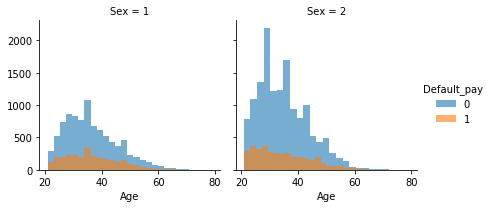

In [22]:
g = sns.FacetGrid(df, col='Sex', hue='Default_pay')
g.map(plt.hist, 'Age', alpha=0.6, bins=25)
g.add_legend()

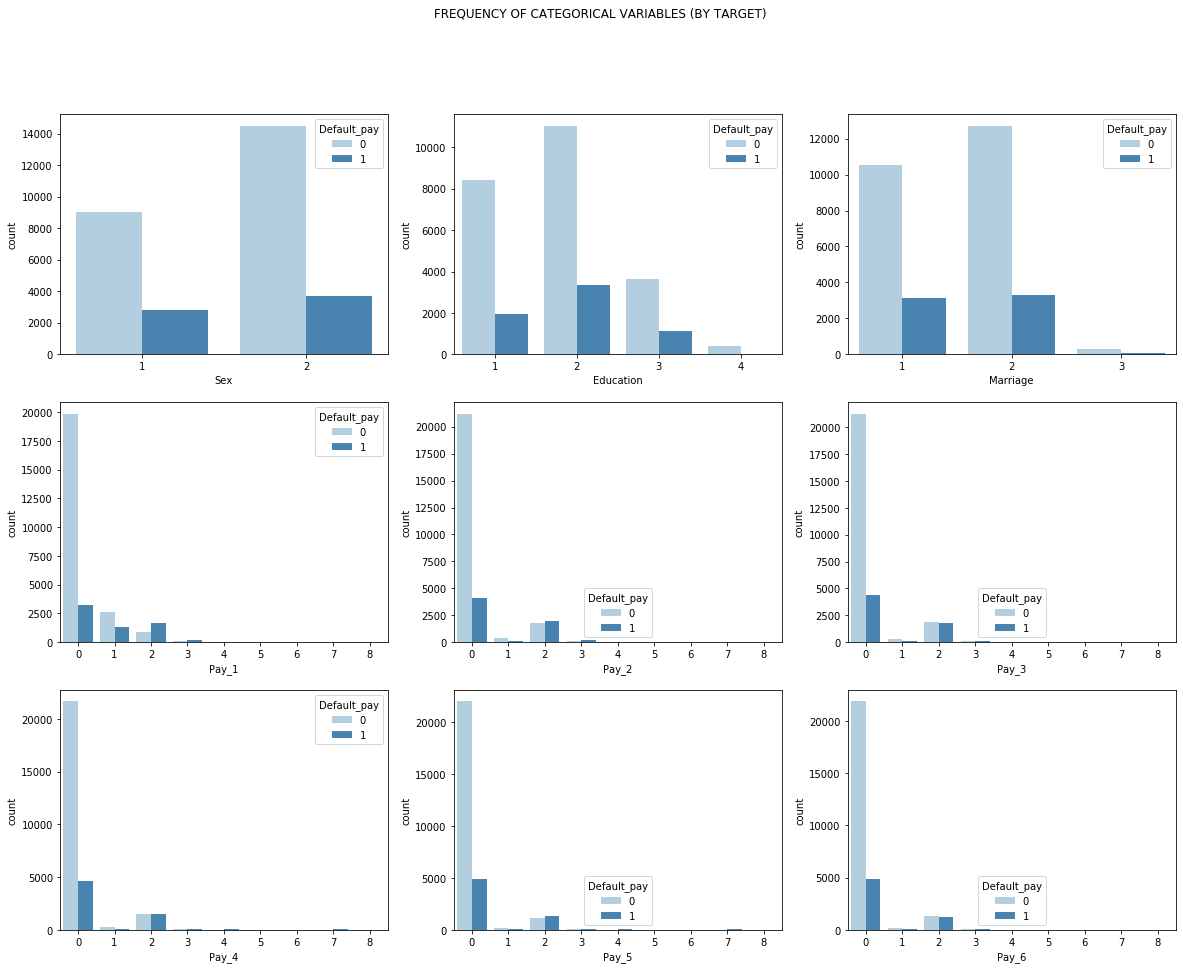

In [23]:
# Creating a new dataframe with categorical variables


subset = df[['Sex', 'Education', 'Marriage', 'Pay_1', 'Pay_2',
       'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Default_pay']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="Sex", hue="Default_pay", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="Education", hue="Default_pay", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="Marriage", hue="Default_pay", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="Pay_1", hue="Default_pay", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="Pay_2", hue="Default_pay", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="Pay_3", hue="Default_pay", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="Pay_4", hue="Default_pay", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="Pay_5", hue="Default_pay", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="Pay_6", hue="Default_pay", data=subset, palette="Blues", ax=axes[2,2])

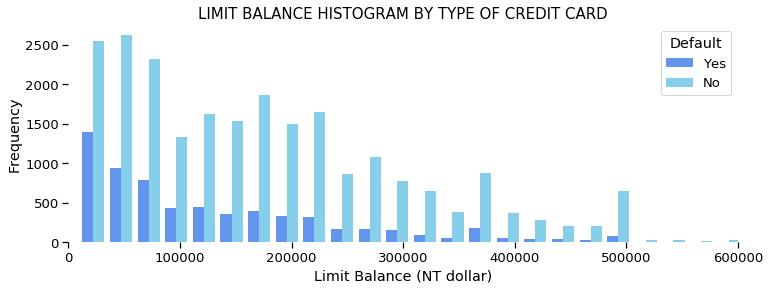

In [24]:
import sys
x1 = list(df[df['Default_pay'] == 1]['Limit_bal'])
x2 = list(df[df['Default_pay'] == 0]['Limit_bal'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density= False, color=['cornflowerblue','skyblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False);

<div class="alert alert-block alert-info">
<b><font size="4"> Data Partitioning :</font></b>
    
Machine learning methods typically require splitting data into multiple chunks for training, validating, and finally testing for building and training a model
    <div>

In [25]:
X = df.drop(['Default_pay'], axis=1)
y = df['Default_pay']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [28]:
X_train_org.shape, y_train.shape
X_test_org.shape, y_test.shape

((7500, 23), (7500,))

<div class="alert alert-block alert-info">
<b><font size="4"> Feature Scaling</font></b>
<div>

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

<div class="alert alert-block alert-info">
<b><font size="4"> Model Evaluation strategy (Metrics Selection)</font></b>

In [76]:
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve,precision_recall_curve, auc

<div class="alert alert-block alert-info">
<b><font size="4">  KNN Classification</font></b>

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
param_grid = {'n_neighbors': np.arange(3,24)}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, return_train_score=True, cv=6, n_jobs=-1)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [34]:
knn_gscv.score(X_test, y_test)
#Accuracy score

0.8069333333333333

In [35]:
print(f'Best parameters: {knn_gscv.best_params_}')
print(f'Best cross-validation score: {knn_gscv.best_score_:0.6f}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'n_neighbors': 21}
Best cross-validation score: 0.808578



KNN Classification: 

	• Train accuracy score: 0.818356
	• Test accuracy score: 0.806933

The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5905
           1       0.61      0.26      0.36      1595

    accuracy                           0.81      7500
   macro avg       0.72      0.61      0.62      7500
weighted avg       0.78      0.81      0.77      7500


The Confusion Matrix is plotted below:


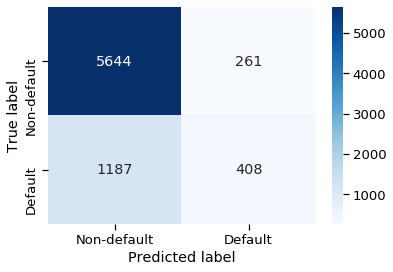

In [36]:
y_pred = knn_gscv.predict(X_test)
print("\nKNN Classification: \n\n\t• Train accuracy score: {:.6f}".format(knn_gscv.score(X_train, y_train)))
print("\t• Test accuracy score: {:.6f}".format(knn_gscv.score(X_test, y_test)))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test, y_pred))
print('\nThe Confusion Matrix is plotted below:')
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label');
# plt.title("Confusion Matrix - KNN Classification");

<div class="alert alert-block alert-info">
<b><font size="4">  Decision Tree Classification</font></b>

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(1, 10)}
dtree_gscv = GridSearchCV(DecisionTreeClassifier(),param_grid,return_train_score=True, cv=6, n_jobs=-1)
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [39]:
dtree_gscv.score(X_test, y_test)
#Accuracy score

0.8221333333333334

In [40]:
print(f'Best parameters: {dtree_gscv.best_params_}')
print(f'Best cross-validation score: {dtree_gscv.best_score_:0.6f}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'criterion': 'gini', 'max_depth': 4}
Best cross-validation score: 0.815511



Decision Tree Classification: 

	• Train accuracy score: 0.817778
	• Test accuracy score: 0.822133

The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.84      0.96      0.89      5905
           1       0.67      0.33      0.44      1595

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.67      7500
weighted avg       0.80      0.82      0.80      7500


The Confusion Matrix is plotted below:


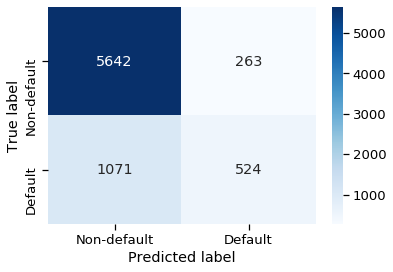

In [41]:
y_pred = dtree_gscv.predict(X_test)
print("\nDecision Tree Classification: \n\n\t• Train accuracy score: {:.6f}".format(dtree_gscv.score(X_train, y_train)))
print("\t• Test accuracy score: {:.6f}".format(dtree_gscv.score(X_test, y_test)))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test, y_pred))
print('\nThe Confusion Matrix is plotted below:')
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label');
# plt.title("Confusion Matrix - Decision tree");

<div class="alert alert-block alert-info">
<b><font size="4"> Logistic Regression</font></b>

In [42]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()

In [43]:
param_c = {'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 21, 23, 25, 30]}
lreg_gscv = GridSearchCV(logistic, param_c, return_train_score=True,cv=6, n_jobs=-1)
lreg_gscv.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 21, 23, 25,
                               30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [44]:
lreg_gscv.score(X_test, y_test)
#Accuracy score

0.8149333333333333

In [45]:
print(f'Best parameters: {lreg_gscv.best_params_}')
print(f'Best cross-validation score: {lreg_gscv.best_score_:0.6f}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 20}
Best cross-validation score: 0.812311



Logistic Regression: 

	• Train accuracy score: 0.811956
	• Test accuracy score: 0.814933

The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5905
           1       0.67      0.26      0.37      1595

    accuracy                           0.81      7500
   macro avg       0.75      0.61      0.63      7500
weighted avg       0.79      0.81      0.78      7500


The Confusion Matrix is plotted below:


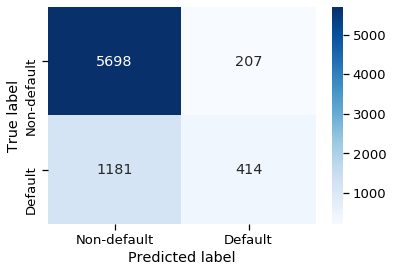

In [46]:
y_pred = lreg_gscv.predict(X_test)
print("\nLogistic Regression: \n\n\t• Train accuracy score: {:.6f}".format(lreg_gscv.score(X_train, y_train)))
print("\t• Test accuracy score: {:.6f}".format(lreg_gscv.score(X_test, y_test)))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test, y_pred))
print('\nThe Confusion Matrix is plotted below:')
cm3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm3,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label');
# plt.title("Confusion Matrix - Logistic Regression");


<div class="alert alert-block alert-info">
<b><font size="4"> Linear Support Vector Machine</font></b>

In [47]:
from sklearn.svm import LinearSVC

In [48]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 105],
              'loss': ['hinge','squared_hinge']}
lsvc_gscv = GridSearchCV(LinearSVC(random_state=0), param_grid, return_train_score=True,cv=6, n_jobs=-1)
lsvc_gscv.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 105],
                         'loss': ['hinge', 'squared_hinge']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [49]:
lsvc_gscv.score(X_test, y_test)
#Accuracy score

0.8164

In [50]:
print(f'Best parameters: {lsvc_gscv.best_params_}')
print(f'Best cross-validation score: {lsvc_gscv.best_score_:0.6f}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 1, 'loss': 'hinge'}
Best cross-validation score: 0.812844



Linear Support Vector Machine: 

	• Train accuracy score: 0.811822
	• Test accuracy score: 0.816400

The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.83      0.97      0.89      5905
           1       0.68      0.26      0.38      1595

    accuracy                           0.82      7500
   macro avg       0.75      0.61      0.63      7500
weighted avg       0.80      0.82      0.78      7500


The Confusion Matrix is plotted below:


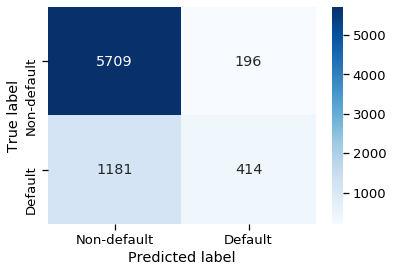

In [51]:
y_pred = lsvc_gscv.predict(X_test)
print("\nLinear Support Vector Machine: \n\n\t• Train accuracy score: {:.6f}".format(lsvc_gscv.score(X_train, y_train)))
print("\t• Test accuracy score: {:.6f}".format(lsvc_gscv.score(X_test, y_test)))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test, y_pred))
print('\nThe Confusion Matrix is plotted below:')
cm4 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm4,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label');
# plt.title("Confusion Matrix - Linear Support Vector Machine");

<div class="alert alert-block alert-info">
<b><font size="4"> Kerenilzed Support Vector Machine (rbf)</font></b>

In [52]:
from sklearn.svm import SVC

In [53]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10]}
rbf_gsvc = GridSearchCV(SVC(kernel='rbf'), param_grid,return_train_score=True, cv=6, n_jobs=-1)
rbf_gsvc.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [54]:
rbf_gsvc.score(X_test, y_test)
#Accuracy score

0.8126666666666666

In [55]:
print(f'Best parameters: {rbf_gsvc.best_params_}')
print(f'Best cross-validation score: {rbf_gsvc.best_score_:0.6f}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.813911



Kerenilzed Support Vector Machine(rbf): 

	• Train accuracy score: 0.834089
	• Test accuracy score: 0.812667

The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5905
           1       0.62      0.31      0.42      1595

    accuracy                           0.81      7500
   macro avg       0.73      0.63      0.65      7500
weighted avg       0.79      0.81      0.79      7500


The Confusion Matrix is plotted below:


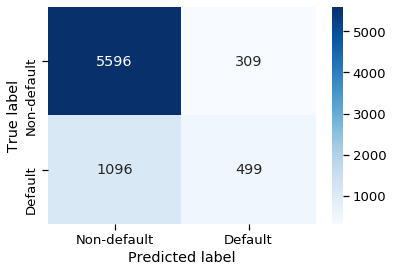

In [56]:
y_pred = rbf_gsvc.predict(X_test)
print("\nKerenilzed Support Vector Machine(rbf): \n\n\t• Train accuracy score: {:.6f}".format(rbf_gsvc.score(X_train, y_train)))
print("\t• Test accuracy score: {:.6f}".format(rbf_gsvc.score(X_test, y_test)))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test, y_pred))
print('\nThe Confusion Matrix is plotted below:')
cm5 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm5,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label');
# plt.title("Confusion Matrix - Kerenilzed Support Vector Machine(rbf)");

<div class="alert alert-block alert-info">
<b><font size="4"> Kerenilzed Support Vector Machine (poly)</font></b>

In [59]:
param_grid = {'C': [10],
              'gamma': [1]}
poly_gsvc = GridSearchCV(SVC(kernel='poly'), param_grid ,cv=6, n_jobs=-1)
poly_gsvc.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [10], 'gamma': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
poly_gsvc.score(X_test, y_test)
#Accuracy score

0.8116

In [62]:
print(f'Best parameters: {poly_gsvc.best_params_}')
print(f'Best cross-validation score: {poly_gsvc.best_score_:0.6f}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.810267



Kerenilzed Support Vector Machine(poly): 

	• Train accuracy score: 0.817289
	• Test accuracy score: 0.811600

The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.82      0.97      0.89      5905
           1       0.66      0.24      0.35      1595

    accuracy                           0.81      7500
   macro avg       0.74      0.60      0.62      7500
weighted avg       0.79      0.81      0.77      7500


The Confusion Matrix is plotted below:


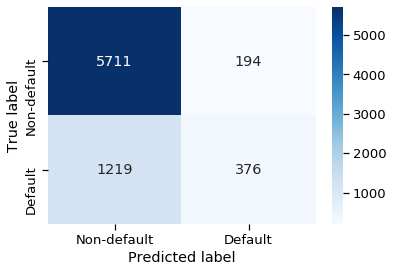

In [66]:
y_pred = poly_gsvc.predict(X_test)
print("\nKerenilzed Support Vector Machine(poly): \n\n\t• Train accuracy score: {:.6f}".format(poly_gsvc.score(X_train, y_train)))
print("\t• Test accuracy score: {:.6f}".format(poly_gsvc.score(X_test, y_test)))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test, y_pred))
print('\nThe Confusion Matrix is plotted below:')
cm6 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm6,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label');
# plt.title("Confusion Matrix - Kerenilzed Support Vector Machine(poly)");

<div class="alert alert-block alert-info">
<b><font size="4"> Kerenilzed Support Vector Machine (linear)</font></b>

In [69]:
param_grid = {'C': [10],
              'gamma': [0.001]}
linear_gsvc = GridSearchCV(SVC(kernel='linear'), param_grid,cv=6, n_jobs=-1)
linear_gsvc.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [10], 'gamma': [0.001]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [70]:
linear_gsvc.score(X_test, y_test)
#Accuracy score

0.8188

In [71]:
print(f'Best parameters: {linear_gsvc.best_params_}')
print(f'Best cross-validation score: {linear_gsvc.best_score_:0.6f}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 10, 'gamma': 0.001}
Best cross-validation score: 0.813733



Kerenilzed Support Vector Machine(linear): 

	• Train accuracy score: 0.813422
	• Test accuracy score: 0.818800

The Classification Report is plotted below: 

               precision    recall  f1-score   support

           0       0.83      0.97      0.89      5905
           1       0.68      0.28      0.39      1595

    accuracy                           0.82      7500
   macro avg       0.76      0.62      0.64      7500
weighted avg       0.80      0.82      0.79      7500


The Confusion Matrix is plotted below:


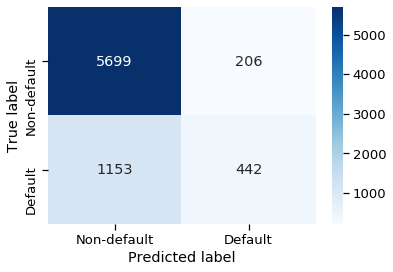

In [73]:
y_pred = linear_gsvc.fit(X_train, y_train).predict(X_test)
print("\nKerenilzed Support Vector Machine(linear): \n\n\t• Train accuracy score: {:.6f}".format(linear_gsvc.score(X_train, y_train)))
print("\t• Test accuracy score: {:.6f}".format(linear_gsvc.score(X_test, y_test)))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test, y_pred))
print('\nThe Confusion Matrix is plotted below:')
cm7 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm7,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label');
# plt.title("Confusion Matrix - Kerenilzed Support Vector Machine(linear)");

<div class="alert alert-block alert-danger">
An accuracy score is a good metric to report. It can be tempting to base the classification models' performance on accuracy if all classes are balanced. In our dataset, we have very imbalanced classes. There are 1561 labeled with 1 and 5939 labeled with 0.   
<br>
    
    
About 20% of clients default, therefore if we make a model that assigns 0 to def_pay, we get approximately 80% accuracy. It can be a misleading metric of the quality of our model.
<br>
    
In this case, we look into metrics including precision, recall and F1 score. A better metric for our dataset is the f1-score. It takes into account both false positives and false negatives. Since our class is so imbalances, we should pay more attention to macro avg. 
<br>
    
    
Also, from our confusion matrix, we noticed that false-negative predictions are worse than false positives, and therefore we should also aim for higher recall.
<div>

<div class="alert alert-block alert-info">
<b><font size="4"> ROC Area Under Curve (AUC) plots for all model </font></b>

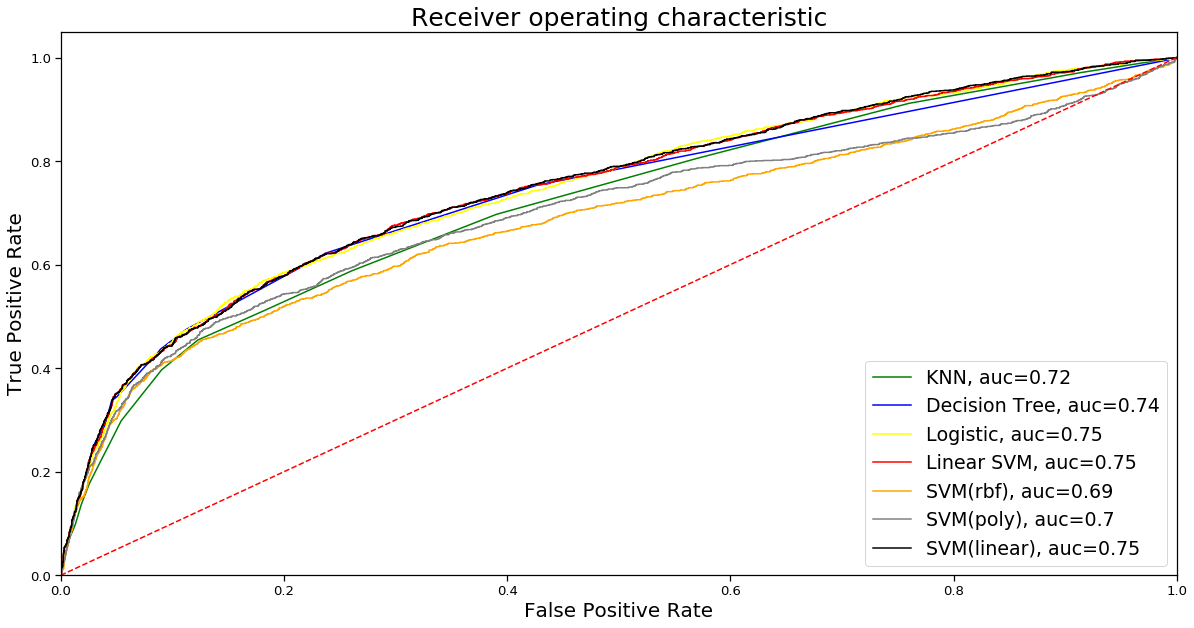

In [233]:
from sklearn.metrics import roc_curve
y_pred_proba_knn = knn_gscv.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba_knn)
roc_auc1 = roc_auc_score(y_test, y_pred_proba_knn)

y_pred_proba_dt = dtree_gscv.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba_dt)
roc_auc2 = roc_auc_score(y_test, y_pred_proba_dt)

y_pred_proba_lr = lreg_gscv.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba_lr)
roc_auc3 = roc_auc_score(y_test, y_pred_proba_lr)

y_pred_proba_lscv = lsvc_gscv.decision_function(X_test)
fpr4, tpr4, _ = roc_curve(y_test,  y_pred_proba_lscv)
roc_auc4 = roc_auc_score(y_test, y_pred_proba_lscv)

y_pred_proba_rbf = rbf_gsvc.decision_function(X_test)
fpr5, tpr5, _ = roc_curve(y_test,  y_pred_proba_rbf)
roc_auc5 = roc_auc_score(y_test, y_pred_proba_rbf)

y_pred_proba_poly = poly_gsvc.decision_function(X_test)
fpr6, tpr6, _ = roc_curve(y_test,  y_pred_proba_poly)
roc_auc6 = roc_auc_score(y_test, y_pred_proba_poly)

y_pred_proba_linear = linear_gsvc.decision_function(X_test)
fpr7, tpr7, _ = roc_curve(y_test,  y_pred_proba_linear)
roc_auc7 = roc_auc_score(y_test, y_pred_proba_linear)

plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1, label="KNN, auc="+str(round(roc_auc1,2)),color='green')
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(roc_auc2,2)),color='blue')
plt.plot(fpr3,tpr3,label="Logistic, auc="+str(round(roc_auc3,2)),color='yellow')
plt.plot(fpr4,tpr4,label="Linear SVM, auc="+str(round(roc_auc4,2)),color='red')
plt.plot(fpr5,tpr5,label="SVM(rbf), auc="+str(round(roc_auc5,2)),color='Orange')
plt.plot(fpr6,tpr6,label="SVM(poly), auc="+str(round(roc_auc6,2)),color='grey')
plt.plot(fpr7,tpr7,label="SVM(linear), auc="+str(round(roc_auc7,2)),color='Black')    
                            
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('Receiver operating characteristic', fontsize=25)
plt.legend(loc="lower right",prop= {'size':19})
plt.savefig('ROC.png')
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4"> Precision-Recall Area Under Curve (AUC) plots for all model </font></b>

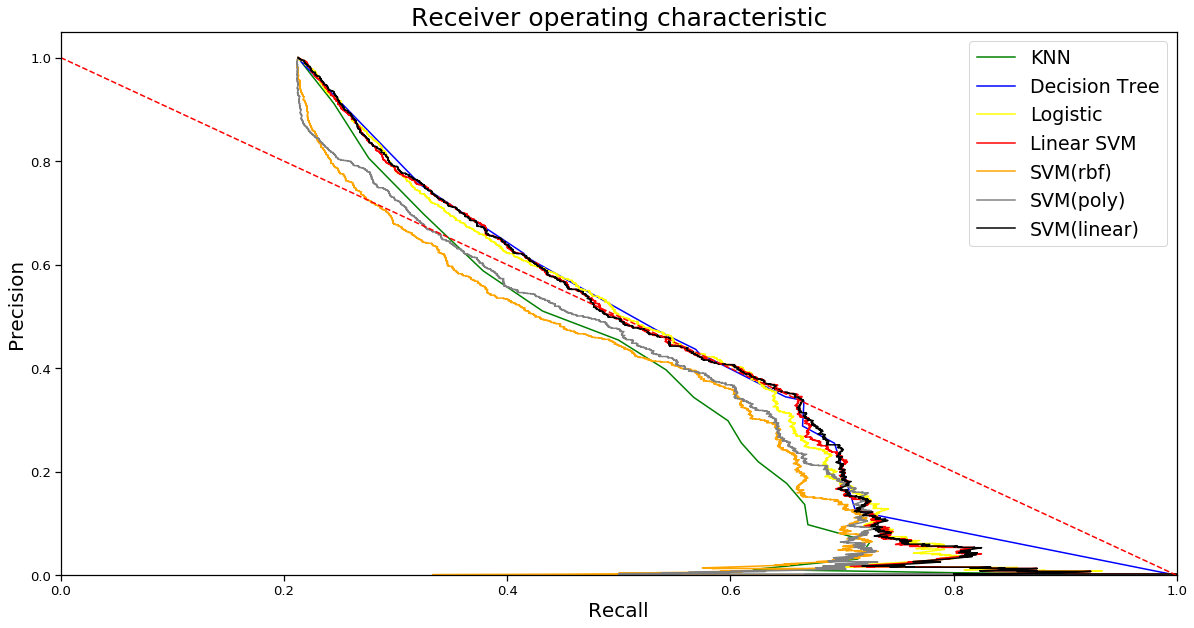

In [234]:
from sklearn.metrics import precision_recall_curve
y_pred_proba_knn = knn_gscv.predict_proba(X_test)[::,1]
precision1, recall1, _ = precision_recall_curve(y_test,  y_pred_proba_knn)
# auc1 = auc(recall1, precision1)

y_pred_proba_dt = dtree_gscv.predict_proba(X_test)[::,1]
precision2, recall2, _ = precision_recall_curve(y_test,  y_pred_proba_dt)
# auc2 = auc(recall2, precision2)

y_pred_proba_lr = lreg_gscv.predict_proba(X_test)[::,1]
precision3, recall3, _ = precision_recall_curve(y_test,  y_pred_proba_lr)
# auc3 = auc(recall3, precision3)

y_pred_proba_lscv = lsvc_gscv.decision_function(X_test)
precision4, recall4, _ = precision_recall_curve(y_test,  y_pred_proba_lscv)
# auc4 = auc(recall4, precision4)

y_pred_proba_rbf = rbf_gsvc.decision_function(X_test)
precision5, recall5, _ = precision_recall_curve(y_test,  y_pred_proba_rbf)
# auc5 = auc(recall5, precision5)

y_pred_proba_poly = poly_gsvc.decision_function(X_test)
precision6, recall6, _ = precision_recall_curve(y_test,  y_pred_proba_poly)
# auc6 = auc(recall6, precision6)

y_pred_proba_linear = linear_gsvc.decision_function(X_test)
precision7, recall7, _ = precision_recall_curve(y_test,  y_pred_proba_linear)
# auc7 = auc(recall7, precision7)

plt.figure(figsize=(20,10))
plt.plot(precision1, recall1, label="KNN", color='green')
plt.plot(precision2, recall2,label="Decision Tree", color='blue')
plt.plot(precision3, recall3,label="Logistic", color='yellow')
plt.plot(precision4, recall4,label="Linear SVM", color='red')
plt.plot(precision5, recall5,label="SVM(rbf)", color='Orange')
plt.plot(precision6, recall6,label="SVM(poly)", color='grey')
plt.plot(precision7, recall7,label="SVM(linear)", color='Black')    

# plt.plot(precision1, recall1, label="KNN, auc="+str(round(auc1,2)),color='green')
# plt.plot(precision2, recall2,label="Decision Tree, auc="+str(round(auc2,2)),color='blue')
# plt.plot(precision3, recall3,label="Logistic, auc="+str(round(auc3,2)),color='yellow')
# plt.plot(precision4, recall4,label="Linear SVM, auc="+str(round(auc4,2)),color='red')
# plt.plot(precision5, recall5,label="SVM(rbf), auc="+str(round(auc5,2)),color='Orange')
# plt.plot(precision6, recall6,label="SVM(poly), auc="+str(round(auc6,2)),color='grey')
# plt.plot(precision7, recall7,label="SVM(linear), auc="+str(round(auc7,2)),color='Black')
                         
plt.plot([0, 1], [1, 0],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.title('Receiver operating characteristic', fontsize=25)
plt.legend(loc="upper right",prop= {'size':19})
plt.savefig('PR.png')
plt.show()

In [162]:
print('\nKNN Classification: ')
print('\t•ROC-AUC score: ',roc_auc1)

print('\nDecision Tree Classification: ')
print('\t•ROC-AUC score: ',roc_auc2)

print('\nLogistic Regression: ')
print('\t•ROC-AUC score: ',roc_auc3)

print('\nLinear Support Vector Machine: ')
print('\t•ROC-AUC score: ',roc_auc4)

print('\nKerenilzed Support Vector Machine(rbf): ')
print('\t•ROC-AUC score: ',roc_auc5)

print('\nKerenilzed Support Vector Machine(poly): ')
print('\t•ROC-AUC score: ',roc_auc6)

print('\nKerenilzed Support Vector Machine(linear): ')
print('\t•ROC-AUC score: ',roc_auc7)


KNN Classification: 
	•ROC-AUC score:  0.7185394663148758

Decision Tree Classification: 
	•ROC-AUC score:  0.7367699123265709

Logistic Regression: 
	•ROC-AUC score:  0.7452375251832171

Linear Support Vector Machine: 
	•ROC-AUC score:  0.7461360782929296

Kerenilzed Support Vector Machine(rbf): 
	•ROC-AUC score:  0.6852296151977895

Kerenilzed Support Vector Machine(poly): 
	•ROC-AUC score:  0.6983011580961886

Kerenilzed Support Vector Machine(linear): 
	•ROC-AUC score:  0.7474081525937054


<div class="alert alert-info" role="alert">
<b><font size="4">  Model Selection: </font></b>
    
Compare all the above models' performance    
</div>

In [166]:
dict={'Accuracy score':[0.806933,0.822133, 0.814933, 0.8164, 0.812666, 0.8116, 0.8188],
      'ROC - AUC':[0.736769, 0.736769, 0.745237, 0.746136, 0.685229, 0.698301,0.747408],
     'Optimal Parameter':['n_neighbors: 21', 'criterion: "gini", max_depth: 4', 'C: 20', 'C: 1, loss: "hinge"','C: 100, gamma: 1','C: 10, gamma: 1','C: 10, gamma: 0.001']}
model_results= pd.DataFrame(dict,index=['KNN Classification', 'Decision Tree Classification', 'Logistic Regression','Linear Support Vector Machine','Kerenilzed Support Vector Machine(rbf)','Kerenilzed Support Vector Machine(poly)','Kerenilzed Support Vector Machine(linear)'])
print('\n\n Metrics Summary of all Models(sorted based on ROC-AUC) :')
display(model_results.sort_values(by=['ROC - AUC'],ascending=False))



 Metrics Summary of all Models(sorted based on ROC-AUC) :


,Accuracy score,ROC - AUC,Optimal Parameter
Kerenilzed Support Vector Machine(linear),0.818800,0.747408,"C: 10, gamma: 0.001"
Linear Support Vector Machine,0.816400,0.746136,"C: 1, loss: ""hinge"""
Logistic Regression,0.814933,0.745237,C: 20
KNN Classification,0.806933,0.736769,n_neighbors: 21
Decision Tree Classification,0.822133,0.736769,"criterion: ""gini"", max_depth: 4"
Kerenilzed Support Vector Machine(poly),0.811600,0.698301,"C: 10, gamma: 1"
Kerenilzed Support Vector Machine(rbf),0.812666,0.685229,"C: 100, gamma: 1"


<div class="alert alert-block alert-warning">
    
Precsion-recall curve focuses on the minority label while the ROC curve covers both. From the ROC curve, the `Kerenilzed Support Vector Machine(linear)` model performs better than the rest of the model area under the curve. However, an algorithm that optimizes the area under the ROC curve is not guaranteed to optimize the area under the PR curve.
<br>
    
We have a highly imbalanced classes with more negative than positive (non default clients than the default people), which indicates that it's more important to focus on the PR curve and maximizing the area under the curve even though it may seems awesome to have good ROC results. 
<div>

In [167]:
model_results.to_csv("project1_result_table.csv")